# P2P personalized learning under different data distributions
---

### Load libraries

In [1]:
import sys
sys.path.append('..')

import time
import torch
import pout
import numpy as np

from src.datasets import get_dataset
from src.models import build_models
from src.network import random_graph, network_graph
from src.helpers import Map
from src.utils import load_conf, exp_details, set_device, log
from src.plots import plot_train_history

%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # 'svg'

### Initialize configuration 

In [2]:
torch.set_num_threads(1)
np.random.seed(0)
start_time = time.time()

In [3]:
args = load_conf()
args.rounds = 100
args.epochs = 10

In [4]:
device = set_device(args)

Using CPU


In [5]:
exp_details(args)


Experimental details:
    Model     : mlp
    Optimizer : adam
    Learning  : 0.001
    Rounds   : 100

    Collaborative learning parameters:
    IID
    Number of peers    : 10
    Local Batch size   : None
    Epochs             : 10



### Load and devide dataset 

In [6]:
train_ds, test_ds, user_groups = get_dataset(args)

In [7]:
# print size of train data for each user 
[len(user_data) for user_data in user_groups.values()]

[6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]

### Build models

In [8]:
models = build_models(args)

In [9]:
# Model overview
models[0]

FFNMnist(
  (network): Sequential(
    (0): Linear(in_features=784, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=10, bias=True)
  )
)

### Build the network graph 

In [10]:
# setup the network topology
topology = random_graph(models, cluster_enabled=False, k=2, sigma=-2)

In [11]:
# build the network graph
graph = network_graph(topology, models, train_ds, test_ds, user_groups, args)

### Perform local training 

In [12]:
train_logs = graph.local_training()

 Event:    Starting local training ...
 Info:     Node(0) is performing local training ...
           Epoch [0], val_loss: 1.6586, val_acc: 0.5650
           Epoch [1], val_loss: 0.9555, val_acc: 0.7500
           Epoch [2], val_loss: 0.5911, val_acc: 0.8267
           Epoch [3], val_loss: 0.4619, val_acc: 0.8633
           Epoch [4], val_loss: 0.3815, val_acc: 0.8917
           Epoch [5], val_loss: 0.3531, val_acc: 0.8983
           Epoch [6], val_loss: 0.3395, val_acc: 0.8950
           Epoch [7], val_loss: 0.3268, val_acc: 0.9017
           Epoch [8], val_loss: 0.3131, val_acc: 0.9067
           Epoch [9], val_loss: 0.2987, val_acc: 0.9050
 Info:     Node(1) is performing local training ...
           Epoch [0], val_loss: 1.6458, val_acc: 0.5833
           Epoch [1], val_loss: 1.0544, val_acc: 0.7350
           Epoch [2], val_loss: 0.7168, val_acc: 0.8150
           Epoch [3], val_loss: 0.5434, val_acc: 0.8550
           Epoch [4], val_loss: 0.4388, val_acc: 0.8767
           Epoch 

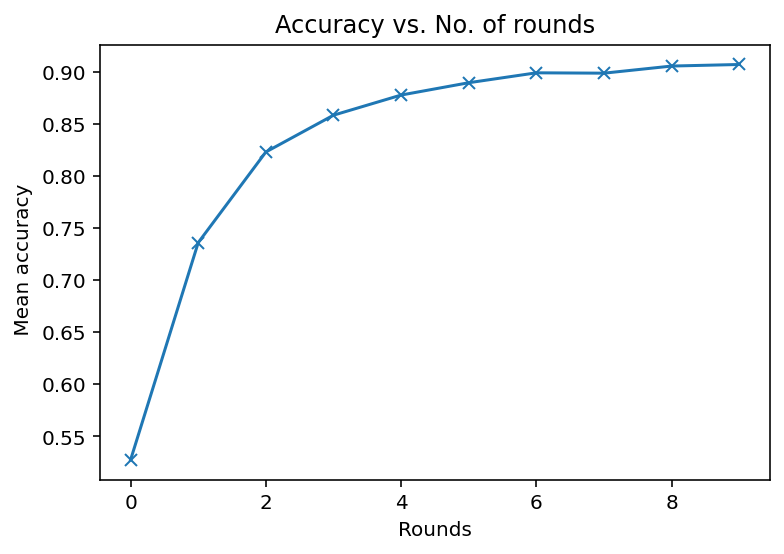

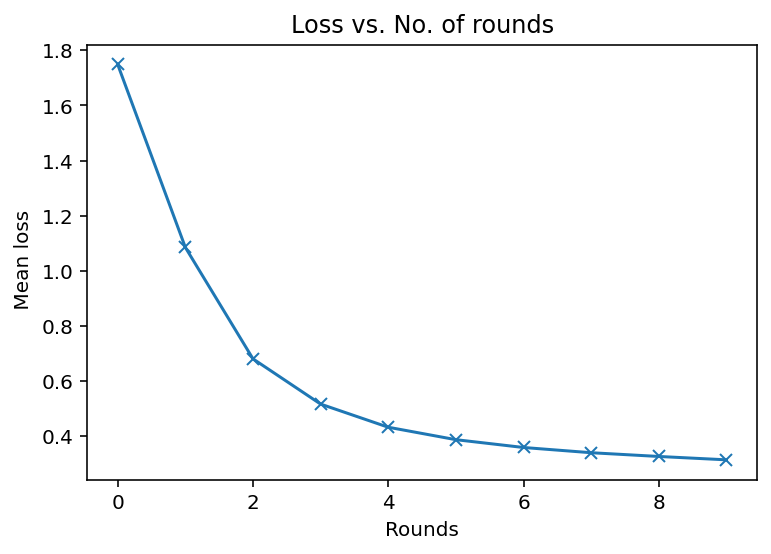

In [13]:
# plot the history of local training phase
plot_train_history(train_logs, metric='accuracy', measure="mean")
plot_train_history(train_logs, metric='loss', measure="mean")

### Collaborative learniing using averaging

In [14]:
from src.learners import average

collab_logs = graph.collaborative_training(learner=average)

  0%|          | 0/100 [00:00<?, ?it/s]

 Event:    Starting collaborative training using Average-based Collaborative Learner ...
 Info:     Collaborative training for 100 rounds


100%|██████████| 100/100 [00:14<00:00,  7.03it/s, peer=Node(1), val_loss=3.34e+4, val_acc=0.105]

 Success:  Collaborative training finished in 14.22 seconds.


In [ ]:
# plot the history of collaborative training phase


### Collaborative learniing using averaging

In [ ]:
from src.learners import model_propagation

collab_logs = graph.collaborative_training(learner=model_propagation)